In [1]:
import os
import glob
import pandas as pd
import numpy as np
import simulation
import pynbody
import astropy.units as u
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

In [2]:
SIM_PATH = '/home/michele/sim/MySimulations/hi_osc/mb.69002_p200_a800_r600/out'
sim = simulation.Simulation(SIM_PATH)


loading simulation: /home/michele/sim/MySimulations/hi_osc/mb.69002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Loading cosmological parameters
Found trace file


In [3]:
def _pairwise(iterable):
    from itertools import tee
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [ ]:
ns = list()
ns_idx = list()
new_stars = list()
snaps = sim
for (a0, a1) in _pairwise(snaps):
    s0, s1 = a0.s['iord'].view(np.ndarray), a1.s['iord'].view(np.ndarray)
    new_stars = np.setdiff1d(s1, s0)
    ns_idx.append(np.where(np.isin(s1, new_stars))[0])
    ns.append(new_stars)

# time contains left border of the time bin
mf = list()
dts = list()
for (idx, (a0, a1)) in zip(ns_idx, _pairwise(snaps)):
    mf.append(np.sum(a1.s['massform'][idx].in_units('Msol')).view(np.ndarray))
    dts.append(a1.header.time - a0.header.time)

massformed = np.array(mf)
dt = np.array(dts)
t_conv_fac = (u.kpc/(u.km/u.s)).to(u.yr)

sfr = (massformed) / (dt * t_conv_fac)
# last snap is not done:
sfr = np.append(sfr, 0)


In [6]:
len(massformed)

562

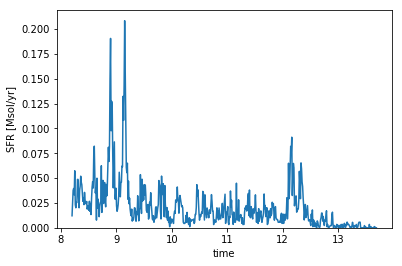

In [49]:
plt.plot(sim.times, sfr)
plt.xlabel('time')
plt.ylabel('SFR [Msol/yr]')
plt.ylim(0, None);

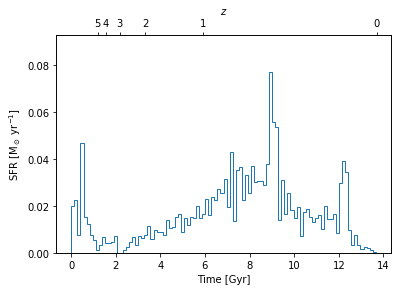

In [50]:
fig, ax = plt.subplots()
sim.plot_sfh(ax);

In [51]:
sim.t_range

(8.203850094768125, 13.689395316894933)

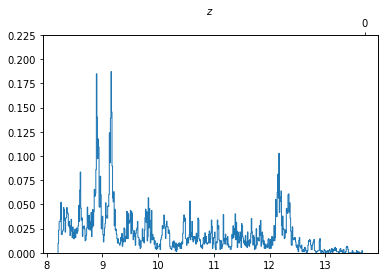

In [52]:
fig, ax = plt.subplots()
sfr_pynb, times = pynbody.plot.stars.sfh(sim.snap_list[-1], subplot=ax, bins=len(sim)+1, trange=sim.t_range);

One next to each other

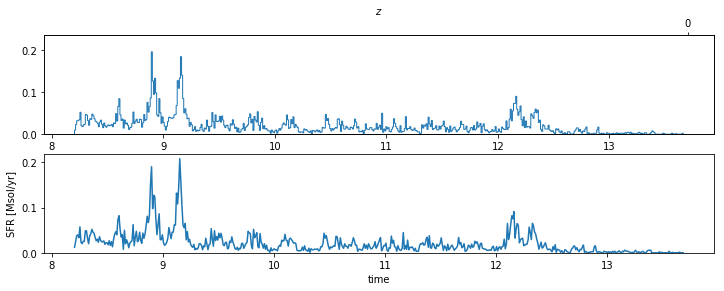

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,4))
pynbody.plot.stars.sfh(sim.snap_list[-1], subplot=ax1, bins=len(sim), trange=sim.t_range);
# ax1.grid()
ax2.plot(sim.times, sfr)
ax2.set_ylim(0, None)
# ax2.grid()
ax2.set_xlabel('time')
ax2.set_ylabel('SFR [Msol/yr]');

In [54]:
sfr[-1]

0.0